<a href="https://colab.research.google.com/github/vanya890/AI_Study_Colab/blob/main/%D0%9A%D1%83%D0%B7%D1%8B%D0%BA_%D0%98%D0%B2%D0%B0%D0%BD_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Библиотека
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation
# Утилиты предобработки данных
from tensorflow.keras import utils
# Оптимизаторы
from tensorflow.keras.optimizers import Adam
# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


Загрузка и просмотр содержимого

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Neuro/Lab4/sonar.csv", header=None)

print(df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

В таблице 61 столбец: первые 60 описывают параметры объекта, последний 61-й содержит класс объекта (R – скала, M – мина).
Бинарная классификация.


In [ ]:
dataset = df.replace('R', 1.).replace('M', 0.).astype(float).to_numpy()

В x_data  заносим параметры объекта, в y_data – класс объекта.

In [ ]:
x_data = dataset[:, :60]
y_data = dataset[:, 60]

In [ ]:
print('Размерность набора параметров объектов', x_data.shape)
print('Размерность набора меток класса', y_data.shape)
print()
print('Содержание y_data:', y_data)


Размерность набора параметров объектов (208, 60)
Размерность набора меток класса (208,)

Содержание y_data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Создание обучающей и тестовой выборки

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, # параметры
                                                    y_data, #  метки классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

print('Обучающая выборка параметров', x_train.shape)
print('Обучающая выборка меток классов', y_train.shape)
print()
print('Тестовая выборка параметров', x_test.shape)
print('Тестовая выборка меток классов', y_test.shape)


Обучающая выборка параметров (166, 60)
Обучающая выборка меток классов (166,)

Тестовая выборка параметров (42, 60)
Тестовая выборка меток классов (42,)


2.	Обучение нейросети
________________________________________
Первый слой - 60 нейронов, 2 слой - 30 нейронов, и последний слой - 1 нейрон.
В выходном слое используем функцию активации sigmoid, (выход от 0 до 1).
binary_crossentropy -  функции ошибки.


In [ ]:
def create_model():

    # Создание модели
    model = Sequential()
    # Добавление слоев
    model.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(30))
    model.add(Activation('relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Компиляция и возврат модели
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    return model
# Создание  модели  create_model()
model = create_model()

# Обучение модели
history = model.fit(x_train,       # Обучающая выборка
          y_train,       # Обучающая выборка меток класса
          batch_size=8,  # Размер батча
          epochs=100,    # Количество эпох обучения
          verbose=1)     # Отображение  обучения


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5171 - loss: 0.6884
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5551 - loss: 0.6585 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - loss: 0.6490 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.5917 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.5559 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.5187  
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7449 - loss: 0.5384
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7566 - loss: 0.4698
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.4500
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.4011
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.4253 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.83

3.	Оценка качества обучения

Создание  валидационной выборки.


In [ ]:
# Создание необученной модели при помощи функции create_model()
model = create_model()
# Обучение нейронной сети
history = model.fit(x_train,               # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=100,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения



Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5670 - loss: 0.6937 - val_accuracy: 0.6471 - val_loss: 0.6823
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7343 - loss: 0.6515 - val_accuracy: 0.6471 - val_loss: 0.6388
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6465 - loss: 0.6397 - val_accuracy: 0.5588 - val_loss: 0.6850
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7220 - loss: 0.6244 - val_accuracy: 0.5882 - val_loss: 0.6393
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7260 - loss: 0.5724 - val_accuracy: 0.5588 - val_loss: 0.6387
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.5463 - val_accuracy: 0.6765 - val_loss: 0.6204
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.5233 - val_accuracy: 0.6765 - val_loss: 0.5792
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7842 - loss: 0.5276 - val_accuracy: 0.7059 - 

 Посмотреть точность на проверочной выборке
________________________________________
Применим метод .evaluate() к модели, параметры -- тестовые выборки. Поместим результат в переменную scores:


In [ ]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7579 - loss: 0.4371 


4.	Визуализация качества обучения
________________________________________
.
________________________________________Строим  график точности на протяжении всего обучения.


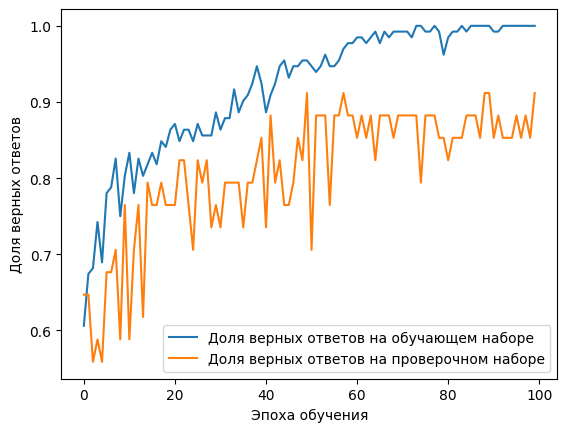

In [ ]:
# Визуализация точности на обучающей выборке

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()


Вывод графика ошибки:
________________________________________
[16]


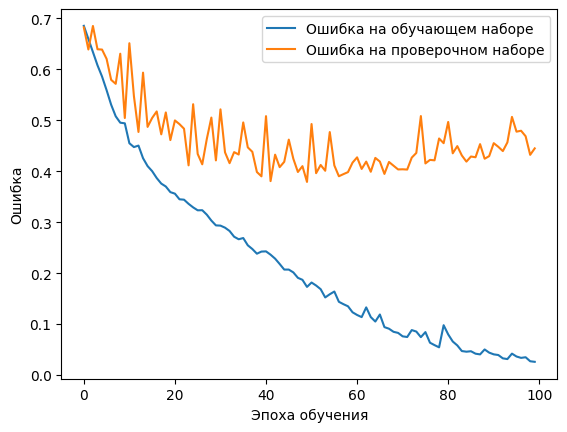

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()


Если ошибка на обучающей выборке стремится к 0, а на проверочной выборке снижается, а потом снова растет – это эффект переобучения.
________________________________________
________________________________________
5.	Слой Dropout

________________________________________
Возьмите исходную архитектуру НС и добавьте слои Dropout :


In [ ]:
# Создание последовательной модели
model = Sequential()
model.add(Dropout(0.3, input_shape=(x_train.shape[1],)))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train,
                    y_train,
                    batch_size=8,
                    epochs=200,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4745 - loss: 0.7336 - val_accuracy: 0.3529 - val_loss: 0.7300
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6095 - loss: 0.6700 - val_accuracy: 0.3529 - val_loss: 0.6944
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5062 - loss: 0.6850 - val_accuracy: 0.6765 - val_loss: 0.6715
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5297 - loss: 0.6843 - val_accuracy: 0.7941 - val_loss: 0.6620
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6055 - loss: 0.6769 - val_accuracy: 0.4706 - val_loss: 0.6808
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4300 - loss: 0.7265 - val_accuracy: 0.5294 - val_loss: 0.6749
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5816 - loss: 0.6581 - val_accuracy: 0.5000 - val_loss: 0.6833
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5373 - loss: 0.6677 - val_accuracy: 0.7941 - val_loss: 0.

Результаты показывают, что после 200 эпох точность на обучающей выборке остановилось на 85%. Переобучения нет.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,565 (64.71 KB)

 Trainable params: 5,521 (21.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,044 (43.14 KB)

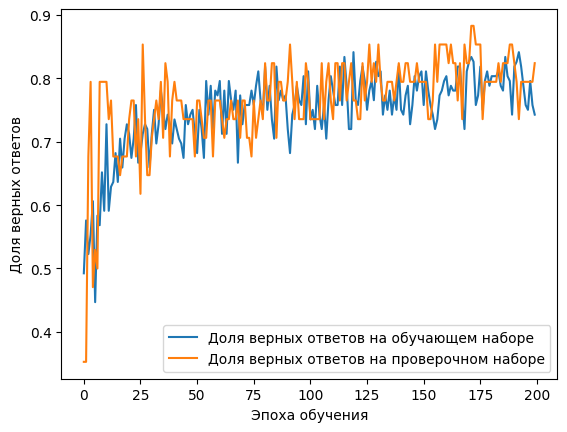

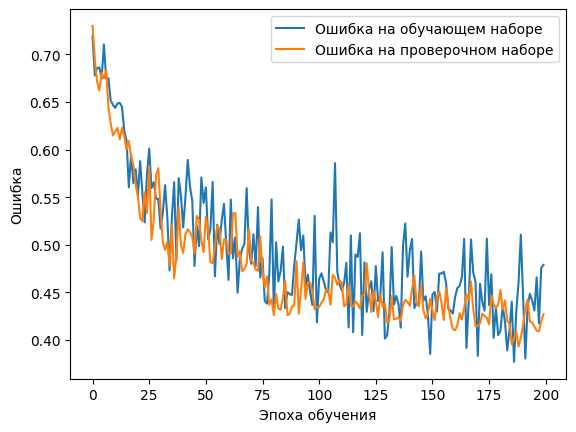

In [ ]:
# Краткая сводка архитектуры модели
model.summary()
# Отрисовка графика точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
# Вывод графика ошибки
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()


In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8686 - loss: 0.3985 
[0.3980647921562195, 0.8809523582458496]
Доля верных ответов на тестовых данных, в процентах: 88.0952%


6.	Слой BatchNormalization
Изменим архитектуру сети, добавим слой BatchNormalization


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5303 - loss: 0.7689 - val_accuracy: 0.6176 - val_loss: 0.6649
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.5758 - loss: 0.7117 - val_accuracy: 0.6765 - val_loss: 0.6585
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6136 - loss: 0.6596 - val_accuracy: 0.7353 - val_loss: 0.6519
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6439 - loss: 0.6133 - val_accuracy: 0.7353 - val_loss: 0.6457
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7045 - loss: 0.5720 - val_accuracy: 0.7353 - val_loss: 0.6396
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7197 - loss: 0.5357 - val_accuracy: 0.7353 - val_loss: 0.6337
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7273 - loss: 0.5035 - val_accuracy: 0.7353 - val_loss: 0.6282
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7273 - loss: 0.4745 - val_accuracy: 0.7353 - val_loss: 0.6228
E

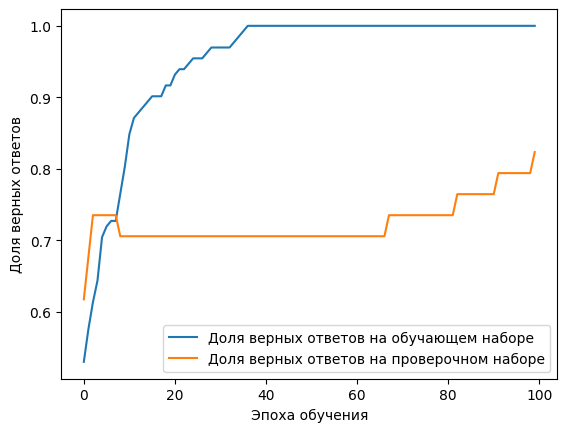

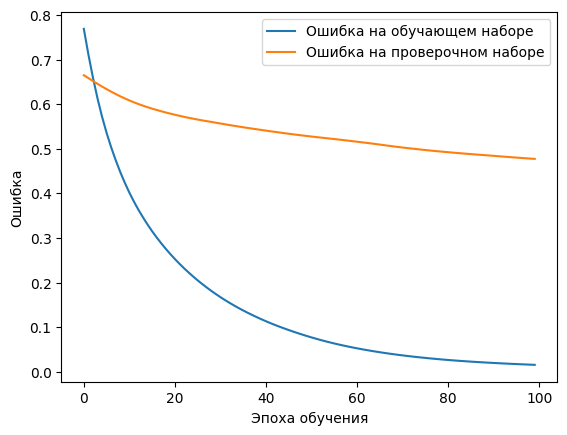

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
model.add(Dense(60, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()


Практическое задание.
Задание 1
1.	Для рассмотренного примера создайте архитектуру сети (совместите слои  Dropout и BatchNormalization).
2.	Обучите сеть.
3.	Сравните полученный результат с результатами в примере.


Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5715 - loss: 0.7351 - val_accuracy: 0.4706 - val_loss: 0.6896
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5595 - loss: 0.7450 - val_accuracy: 0.7647 - val_loss: 0.6617
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6248 - loss: 0.6938 - val_accuracy: 0.7353 - val_loss: 0.6420
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6372 - loss: 0.6106 - val_accuracy: 0.7647 - val_loss: 0.6289
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7421 - loss: 0.5418 - val_accuracy: 0.7941 - val_loss: 0.6261
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6622 - loss: 0.5874 - val_accuracy: 0.7941 - val_loss: 0.6165
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6291 - loss: 0.6295 - val_accuracy: 0.8235 - val_loss: 0.6096
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6442 - loss: 0.5604 - val_accuracy: 0.7941 - 

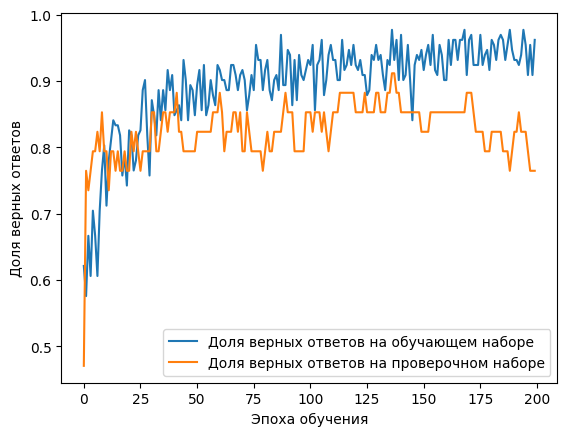

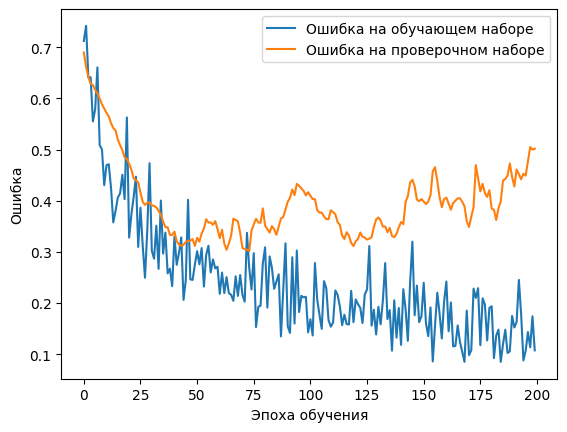

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8264 - loss: 0.2366 
[0.22821204364299774, 0.8333333134651184]
Доля верных ответов на тестовых данных, в процентах: 83.3333%


In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    batch_size=8,
                    epochs=200,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

Задание 2
Используя набор   train.csv   
1.	Создайте модели нейронной сети с различными архитектурами. Выведите графики точности и ошибки на обучающей и валидационной выборках, на тестовой выборке.
2.	Получите  значения точности на проверочной выборке не менее 90%. Выведите архитектуру соответствующей модели сети.


In [2]:
# Подключите google drive
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


drive.mount('/content/drive')

# Загрузите данные
df = pd.read_csv('/content/drive/My Drive/Neuro/Lab4/train.csv', sep=';')
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2000, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.2532 - loss: 1.8565 - val_accuracy: 0.2700 - val_loss: 4.4391
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2496 - loss: 1.8112 - val_accuracy: 0.2767 - val_loss: 2.8606
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2674 - loss: 1.7432 - val_accuracy: 0.3067 - val_loss: 2.1902
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2642 - loss: 1.6957 - val_accuracy: 0.2967 - val_loss: 1.8477
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2933 - loss: 1.6680 - val_accuracy: 0.3267 - val_loss: 1.6684
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2932 - loss: 1.6256 - val_accuracy: 0.3067 - val_loss: 1.5819
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2708 - loss: 1.6280 - val_accuracy: 0.2733 - val_loss: 1.5534
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3124 - loss: 1.5973 - val_accuracy: 0.2600 - val_loss

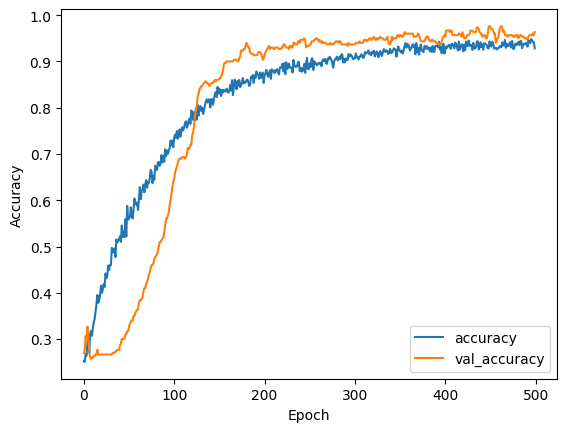

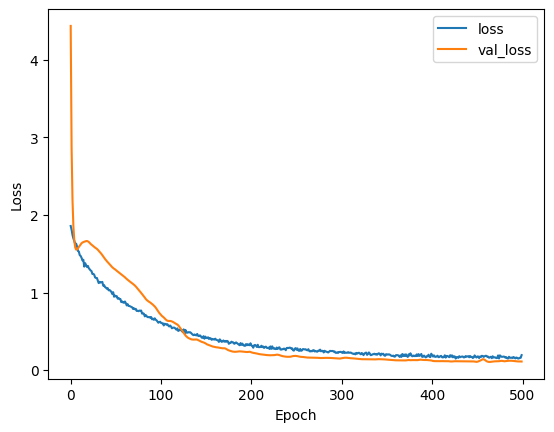

Test accuracy: 0.9633333086967468


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 60)                  │           1,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 60)                  │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,284 (40.18 KB)

 Trainable params: 3,374 (13.18 KB)

 Non-trainable params: 160 (640.00 B)

 Optimizer params: 6,750 (26.37 KB)

In [4]:
# Подключите google drive
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt


drive.mount('/content/drive')

# Загрузите данные
df = pd.read_csv('/content/drive/My Drive/Neuro/Lab4/train.csv', sep=';')
print(df.shape)
df.head()

# Выберите признаки и целевую переменную
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42
)

# Создайте модель нейронной сети
model = Sequential()
model.add(BatchNormalization(input_shape=(X_train.shape[1], )))
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
# Компилируйте модель
model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=500, # Увеличиваем количество эпох
    batch_size=1600,
    validation_split=0.2,
    validation_data=(X_test, y_test),
)

# Выведите графики точности и ошибки
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Оцените модель на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

# Выведите архитектуру модели
model.summary()